Spatial Operations in Image Processing

In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png

--2022-10-18 14:12:16--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7243 (7.1K) [image/jpeg]
Saving to: ‘cameraman.jpeg’

cameraman.jpeg      100%[===================>]   7.07K  --.-KB/s    in 0s      

2022-10-18 14:12:16 (626 MB/s) - ‘cameraman.jpeg’ saved [7243/7243]

--2022-10-18 14:12:17--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

Linear Filtering

[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 ...

 [[ 60  18  84]
  [ 60  18  84]
  [ 58  27  92]
  ...
  [ 84  73 173]
  [ 76  68 172]
  [ 79  62 177]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]]


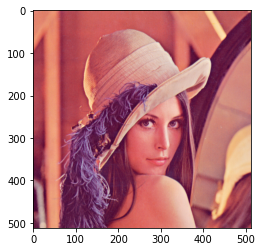

In [4]:
image = cv2.imread("lenna.png")
print(image)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

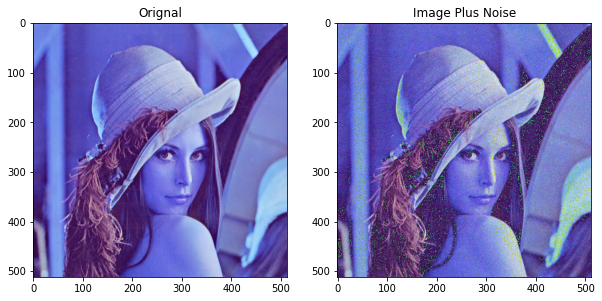

In [5]:
rows,cols,_ = image.shape
noise = np.random.normal(0,15,(rows,cols,3)).astype(np.uint8)
noisy_image = image+noise
plot_image(image,noisy_image,title_1="Orignal",title_2="Image Plus Noise")

Filtering Noise

In [6]:
kernel=np.ones((6,6))/36

In [7]:
image_filtered = cv2.filter2D(src=noisy_image,ddepth=-1,kernel=kernel)

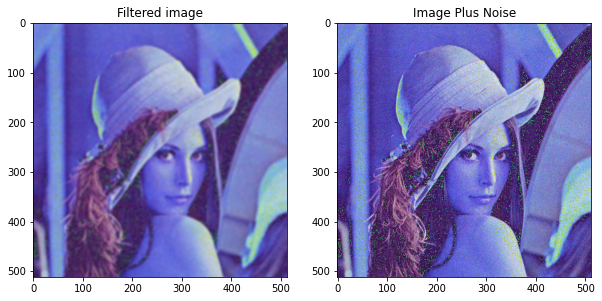

In [8]:
plot_image(image_filtered,noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

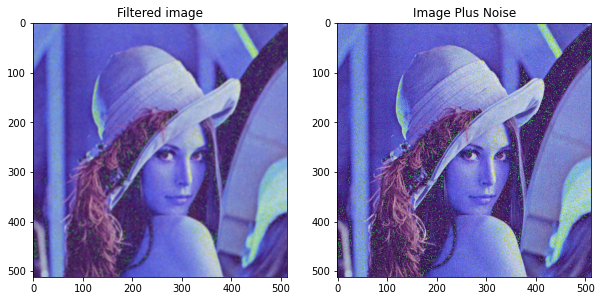

In [9]:
kernel=np.ones((4,4))/16
image_filtered = cv2.filter2D(src=noisy_image,ddepth=-1,kernel=kernel)
plot_image(image_filtered,noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

Gaussian Blur

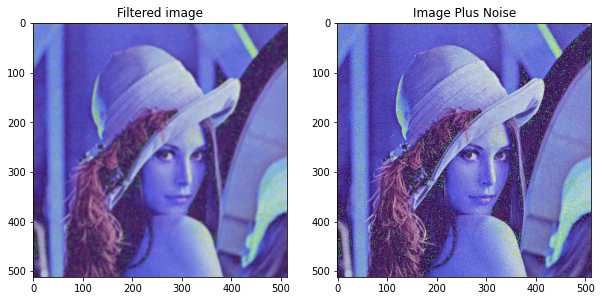

In [10]:
image_filtered = cv2.GaussianBlur(noisy_image,(5,5),sigmaX=4,sigmaY=4)
plot_image(image_filtered,noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

Image Sharpening

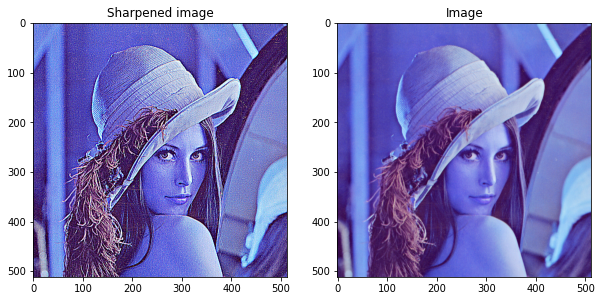

In [11]:
kernel = np.array([[-1,-1,-1],
                   [-1, 9,-1],
                   [-1,-1,-1]])
sharpened = cv2.filter2D(image,-1,kernel)
plot_image(sharpened,image,title_1="Sharpened image",title_2="Image")

Edges

[[181 201 202 ... 103 102  92]
 [171 198 201 ...  94  96  96]
 [175 195 193 ...  87  96  98]
 ...
 [100  97  97 ... 114 113 117]
 [ 94  97  99 ... 111 112 114]
 [ 96  95  98 ... 113 104 109]]


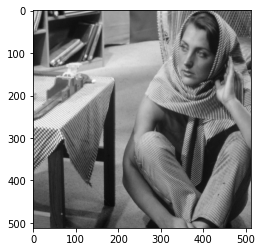

In [13]:
img_gray = cv2.imread('barbara.png',cv2.IMREAD_GRAYSCALE)
print(img_gray)
plt.imshow(img_gray,cmap='gray')

In [15]:
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(src=img_gray,ddepth=ddepth,dx=1,dy=0,ksize=3)

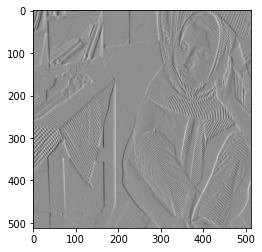

In [16]:
plt.imshow(grad_x,cmap='gray')

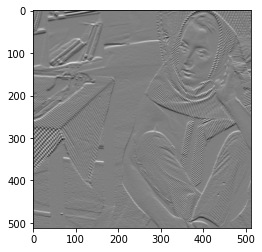

In [19]:
grad_y = cv2.Sobel(src=img_gray,ddepth=ddepth,dx=0,dy=1,ksize=3)
plt.imshow(grad_y,cmap='gray')

In [20]:
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

In [21]:
grad = cv2.addWeighted(abs_grad_x,0.5,abs_grad_y,0.5,0)

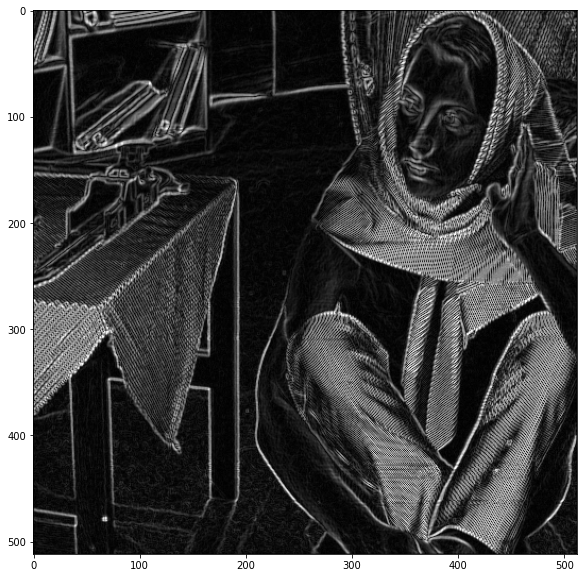

In [22]:
plt.figure(figsize=(10,10))
plt.imshow(grad,cmap='gray')

Median

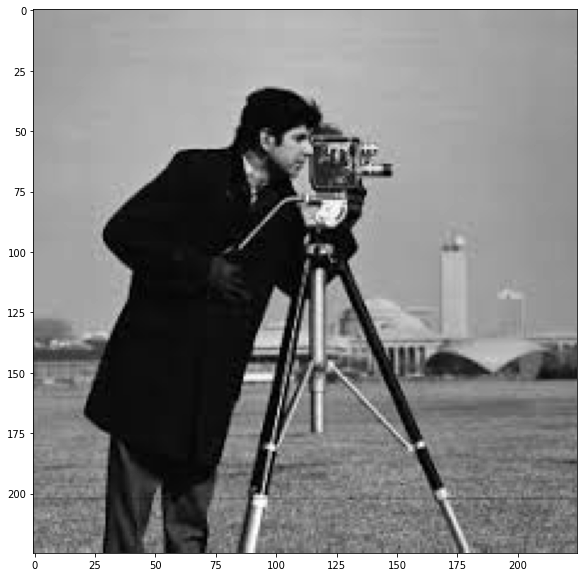

In [23]:
image = cv2.imread("cameraman.jpeg",cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(image,cmap="gray")

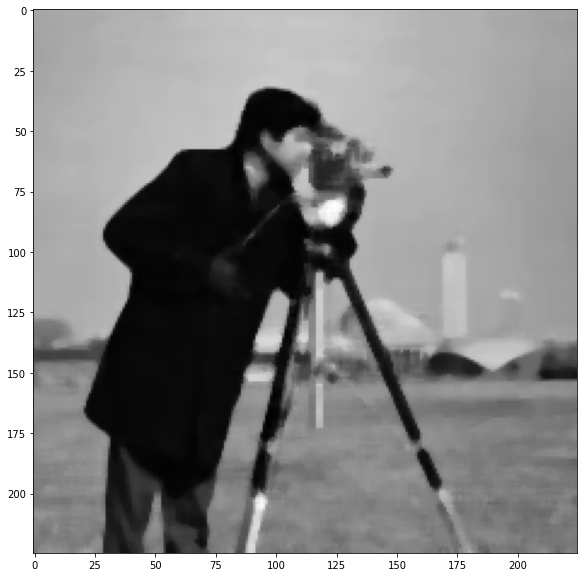

In [24]:
filtered_image = cv2.medianBlur(image,5)
plt.figure(figsize=(10,10))
plt.imshow(filtered_image,cmap="gray")

Threshold Function Parameters

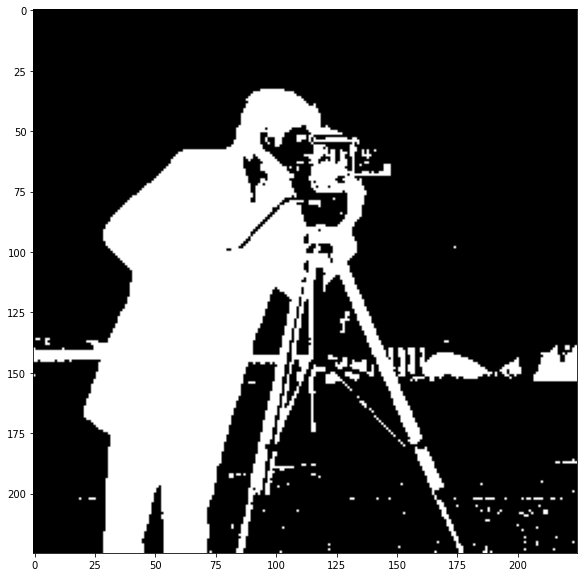

In [25]:
ret, outs = cv2.threshold(src=image,thresh=0,maxval=255,type=cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)
plt.figure(figsize=(10,10))
plt.imshow(outs,cmap='gray')